In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:

import os
import sys
import json

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
%matplotlib inline

In [68]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [69]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

In [70]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [71]:
# use yaml or csv input file
use_yaml = True

In [72]:
# pick an example from given three options

case_type = 'wildcat'

# case_type = 'smeaheia_v1'

# case_type = 'smeaheia_v2'

In [73]:
# where pvt located
pvt_path = '../test_data/pvt_constants/'

# Examples

The following are the test examples.

In [74]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
wildcat = {
         'well_input': r'GaP_input_Wildcat_v3.csv', 
         'well_input_yaml': r'wildcat.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/wildcat', 
         'simcase': r'TEMP-0'}

In [75]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'wildcat': wildcat
}

# Load well CSV or yaml configuration file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [76]:
# the selected example for testing
case = examples[case_type]


In [77]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


In [78]:
if use_yaml:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input_yaml'])
    
    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input'])

    # load the well information
    well_csv = csv_parser(well_name)

In [79]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

In [93]:
my_pressure = Pressure(
    header      = well_csv['well_header'],
    reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path,
    max_pressure_pos = my_well.barriers
)

Hydrostatic pressure at reference depth 2238 is 224.23
RP1 set as hydrostatic P = 224.23 bar
RP2 is set as delta pressure, which yields P = 224.23 +20.00 = 244.23 bar
RP3 ignored
max_pressure_pos is a dictionary of barrriers
Pressure scenario RP1: Compute pressures assuming reservoir pressure is 224.23 bar at 2238.00 mTVDMSL
Pressure scenario RP2: Compute pressures assuming reservoir pressure is 244.23 bar at 2238.00 mTVDMSL
Pressure scenario max_p_cplug3: Compute maximum pressurization needed to reach Shmin at 123 mTVDMSL
Pressure scenario max_p_cplug2: Compute maximum pressurization needed to reach Shmin at 1823 mTVDMSL
Pressure scenario max_p_cplug1: Compute maximum pressurization needed to reach Shmin at 2273 mTVDMSL


In [89]:
my_pressure.pressure_CO2

init                                                      RP1  \
     depth_msl    temp        hs_p       RHOH2O       Shmin         h2o   
0            0    4.00    1.013250  1025.767947    1.013250    1.013250   
1            1    4.00    1.113843  1025.767947    1.113843    1.109309   
2            2    4.00    1.214437  1025.773001    1.214437    1.209904   
3            3    4.00    1.315032  1025.778055    1.315032    1.310499   
4            4    4.00    1.415627  1025.783109    1.415627    1.411094   
...        ...     ...         ...          ...         ...         ...   
4465      4465  178.40  436.211250   936.616686  750.598269  436.211250   
4466      4466  178.44  436.303097   936.579086  750.767769  436.303097   
4467      4467  178.48  436.394941   936.541481  750.937269  436.394941   
4468      4468  178.52  436.486780   936.503870  751.106769  436.486780   
4469      4469  178.56  436.578616   936.466252  751.276269  436.578616   

                                                                ...  \
          h2o_rho        co2     co2_rho h2o_rho_in_co2_column  ...   
0     1025.772773  62.006799  925.485387           1028.811368  ...   
1     1025.777827  62.097558  925.563425           1028.815866  ...   
2     1025.782881  62.188325  925.641403           1028.820364  ...   
3     1025.787935  62.279099  925.719320           1028.824862  ...   
4     1025.792988  62.369881  925.797177           1028.829360  ...   
...           ...        ...         ...                   ...  ...   
4465   936.616686        NaN         NaN                   NaN  ...   
4466   936.579086        NaN         NaN                   NaN  ...   
4467   936.541481        NaN         NaN                   NaN  ...   
4468   936.503870        NaN         NaN                   NaN  ...   
4469   936.466252        NaN         NaN                   NaN  ...   

     max_p_cplug3              max_p_cplug2                          \
              h2o      h2o_rho          co2     co2_rho         h2o   
0        1.013250  1025.767947          NaN         NaN  105.953072   
1        1.013250  1025.767947          NaN         NaN  106.054177   
2        1.013250  1025.767947          NaN         NaN  106.155283   
3        1.013250  1025.767947          NaN         NaN  106.256389   
4        1.013250  1025.767947          NaN         NaN  106.357495   
...           ...          ...          ...         ...         ...   
4465   218.518722   925.984810   474.468735  539.641506  542.779585   
4466   218.609527   925.950609   474.521648  539.555910  542.871432   
4467   218.700328   925.916403   474.574552  539.470339  542.963275   
4468   218.791126   925.882192   474.627447  539.384793  543.055115   
4469   218.881921   925.847976   474.680334  539.299274  543.146951   

                  max_p_cplug1                                       
          h2o_rho          co2     co2_rho         h2o      h2o_rho  
0     1030.983338          NaN         NaN  148.711728  1033.071328  
1     1030.988299          NaN         NaN  148.813038  1033.076252  
2     1030.993259          NaN         NaN  148.914348  1033.081175  
3     1030.998220          NaN         NaN  149.015659  1033.086098  
4     1031.003180          NaN         NaN  149.116970  1033.091022  
...           ...          ...         ...         ...          ...  
4465   936.616686   519.482815  539.641506  586.036667   936.616686  
4466   936.579086   519.535728  539.555910  586.128514   936.579086  
4467   936.541481   519.588632  539.470339  586.220358   936.541481  
4468   936.503870   519.641527  539.384793  586.312197   936.503870  
4469   936.466252   519.694414  539.299274  586.404033   936.466252  

[4470 rows x 27 columns]

In [90]:
pd.DataFrame(my_pressure.pressure_scenarios).T


,name,p_resrv,type,p_MSAD,z_MSAD,z_resrv,p_delta
1,RP1,224.234034,reservoir,132.628586,819.161165,2238,0.0
2,RP2,244.234034,reservoir,161.855351,991.590453,2238,20.0
3,max_p_cplug3,21.671835,max_p,14.629269,123,2370.0,-215.477018
4,max_p_cplug2,343.172122,max_p,302.779269,1823,2370.0,106.023269
5,max_p_cplug1,386.363055,max_p,379.054269,2273,2370.0,149.214203


# Visualization

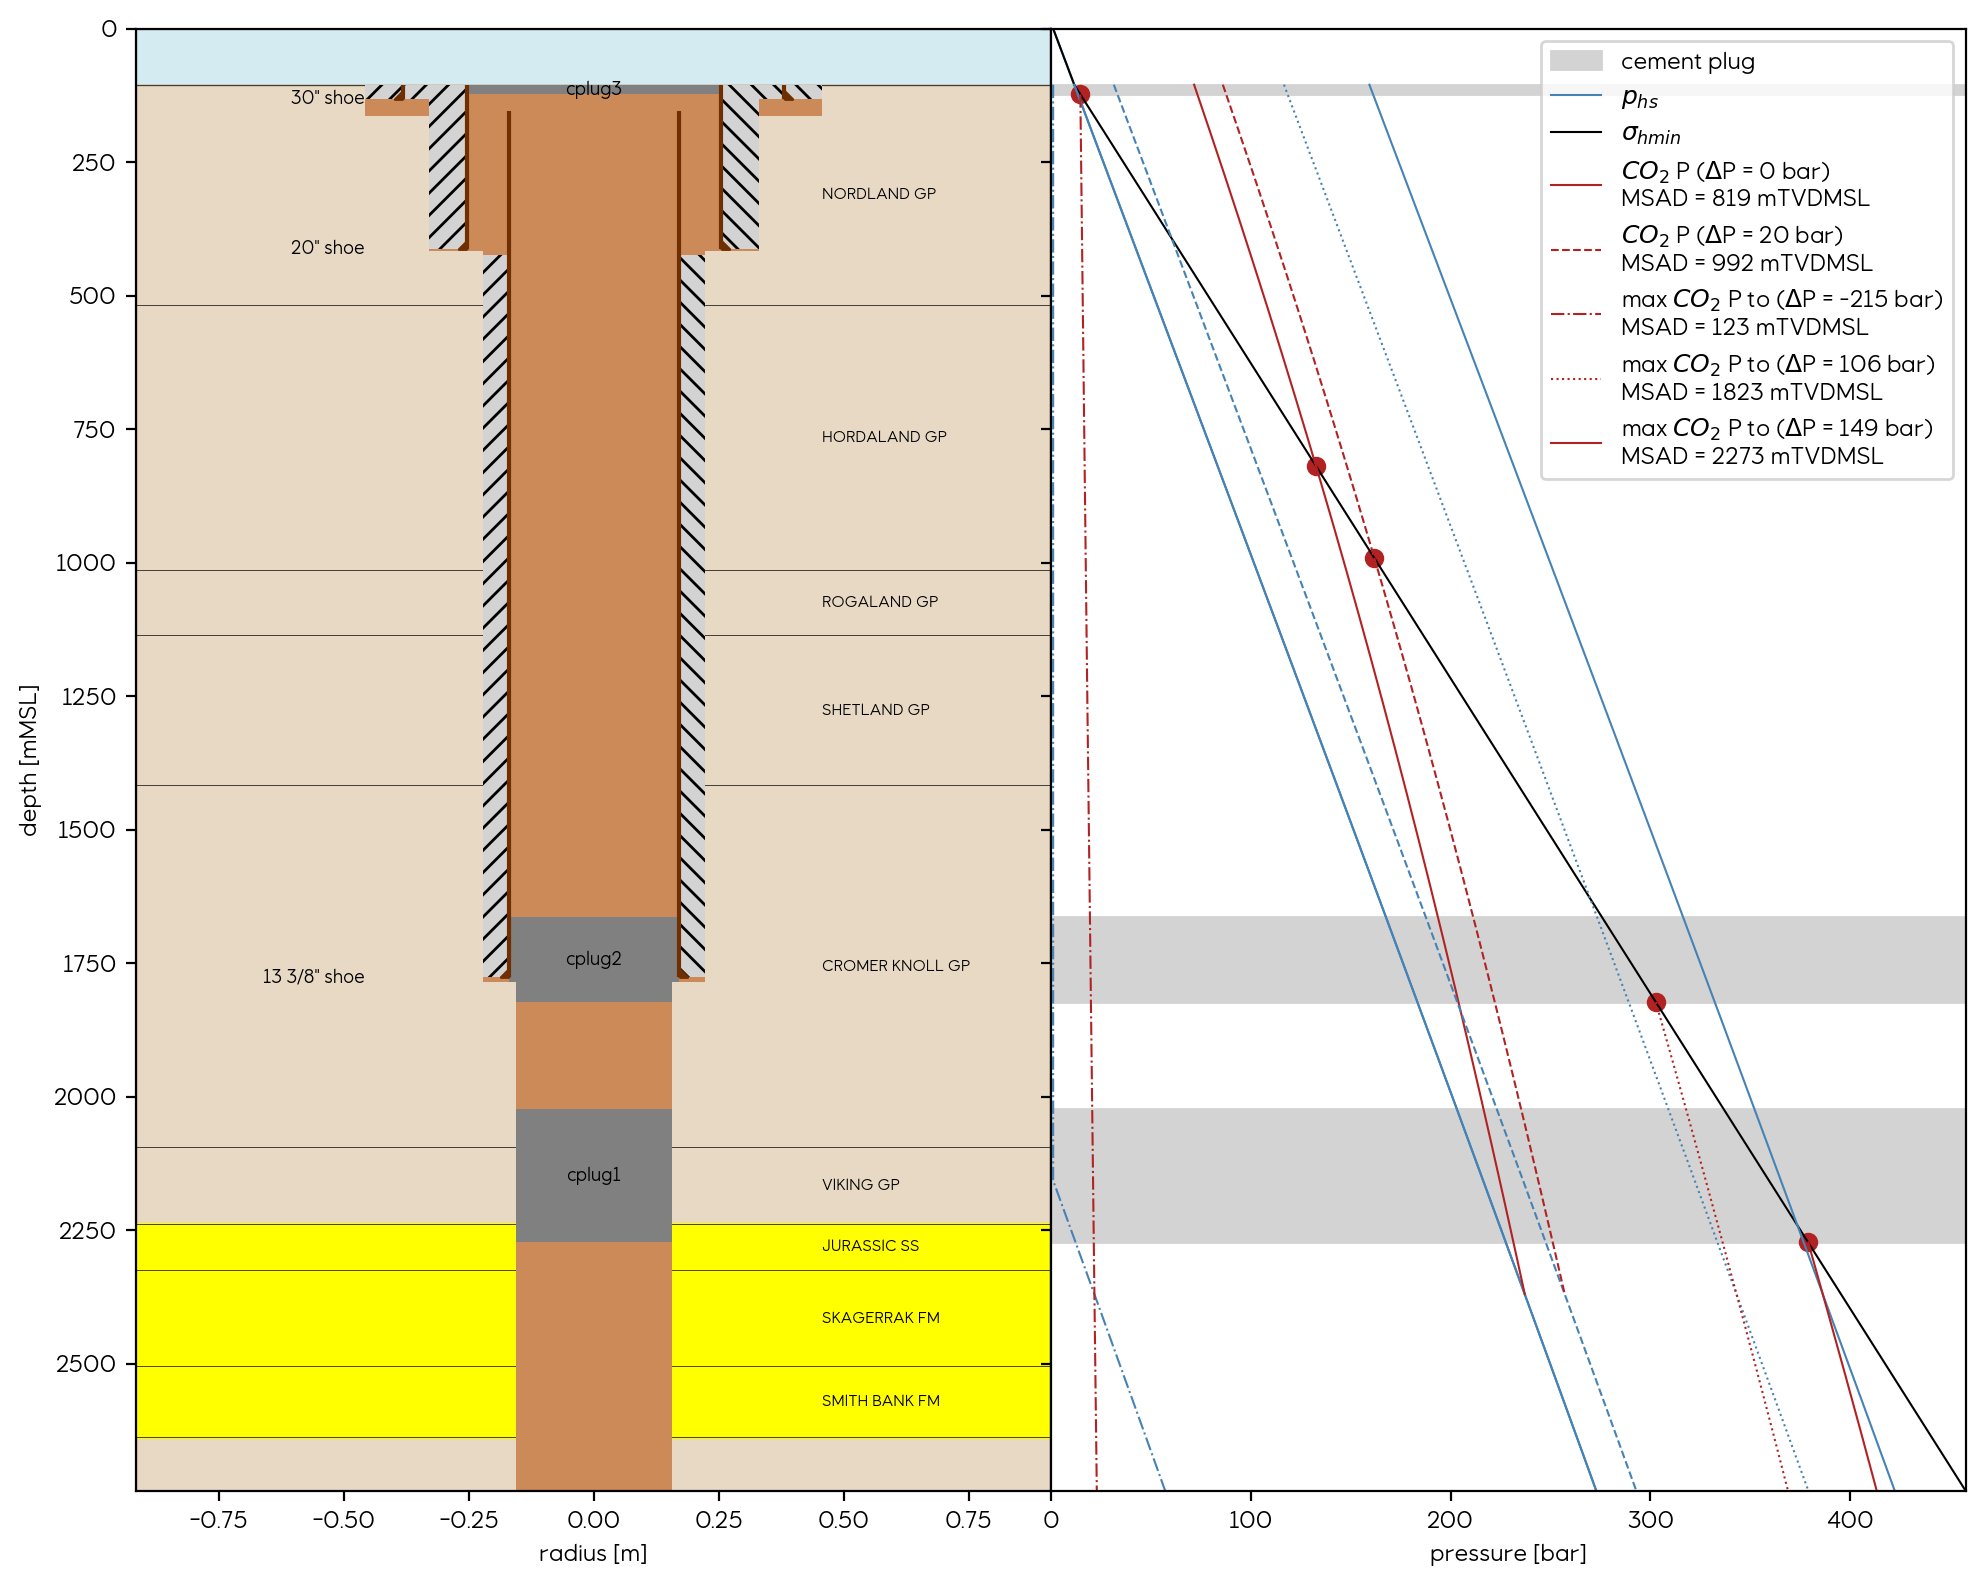

In [91]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_RP=True, #plot reservoir pressure scenarios
              plot_MSAD= True, #plot minimum safety abandonment depth
              plot_maxP=True #plot max expected pressures
              )

fig.tight_layout()
fig.subplots_adjust(wspace=0)


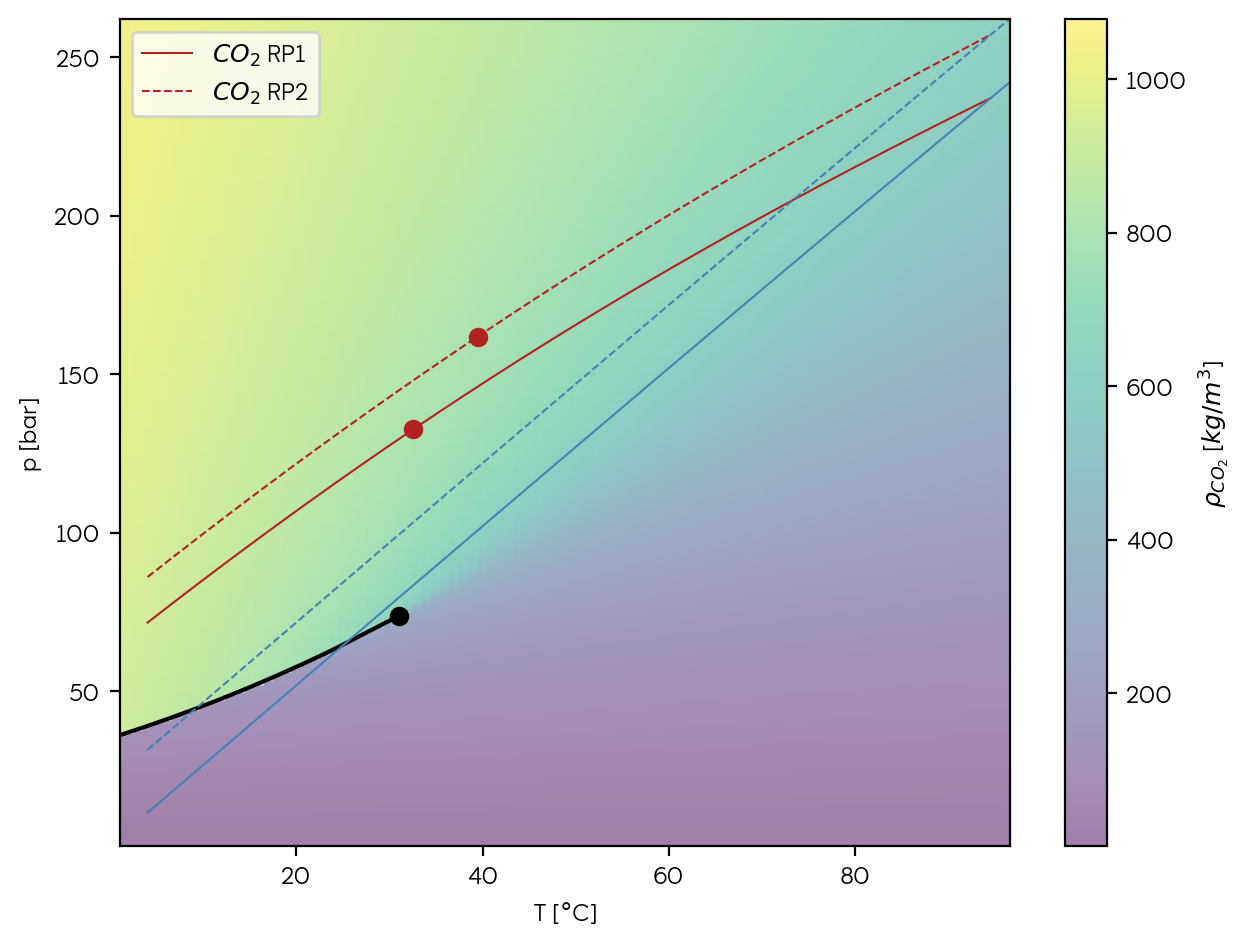

In [92]:
plot_pt(my_pressure, plot_RP=True, plot_maxP=False, plot_MSAD=True)

# CO2 Leakage

In [85]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

'cplug1'

In [86]:
# compute its leakage
barrier_leakage = my_pressure.compute_barrier_leakage(my_well, main_barrier)
barrier_leakage

barrier_perm:  [0.01, 10.0, 1000.0]


,0.01,10.00,1000.00
RP1,0,0.00995,1.00604
RP2,0,0.01492,1.50341
